In [9]:
import os
from lida import Manager, llm
import pandas as pd

In [3]:
os.environ['COHERE_API_KEY'] = 'YOUR_API_KEY'

In [4]:
lida = Manager(text_gen = llm('cohere'))

In [5]:
summary = lida.summarize(r"C:\Users\navab\Downloads\retail_sales_dataset.csv")

In [6]:
summary

{'name': 'C:\\Users\\navab\\Downloads\\retail_sales_dataset.csv',
 'file_name': 'C:\\Users\\navab\\Downloads\\retail_sales_dataset.csv',
 'dataset_description': '',
 'fields': [{'column': 'Transaction_ID',
   'properties': {'dtype': 'number',
    'std': 288,
    'min': 1,
    'max': 1000,
    'samples': [522, 738, 741],
    'num_unique_values': 1000,
    'semantic_type': '',
    'description': ''}},
  {'column': 'Date',
   'properties': {'dtype': 'date',
    'min': '2023-01-01',
    'max': '2024-01-01',
    'samples': ['2023-04-04', '2023-04-13', '2023-04-15'],
    'num_unique_values': 345,
    'semantic_type': '',
    'description': ''}},
  {'column': 'Customer_ID',
   'properties': {'dtype': 'string',
    'samples': ['CUST522', 'CUST738', 'CUST741'],
    'num_unique_values': 1000,
    'semantic_type': '',
    'description': ''}},
  {'column': 'Gender',
   'properties': {'dtype': 'category',
    'samples': ['Female', 'Male'],
    'num_unique_values': 2,
    'semantic_type': '',
    'd

In [7]:
goals = lida.goals(summary,n=5)

In [10]:
pd.DataFrame(goals)

,question,visualization,rationale,index
0,What is the distribution of Customer Ages?,Histogram of Age,A histogram will allow us to understand the di...,0
1,What is the average total amount spent in a tr...,Average of Total Amount,I'm choosing this visualization because it wil...,1
2,What is the distribution of the number of item...,Histogram of Quantity,A histogram can give us an understanding of th...,2
3,What is the average price per unit cost?,Line graph of Average Price,By plotting a line graph showing the average p...,3
4,What is the most popular product category?,Bar chart of Product Categories,A bar chart allows us to easily see which prod...,4


In [12]:
from lida.utils import plot_raster

In [20]:
charts = lida.visualize(summary=summary,goal=goals[2])

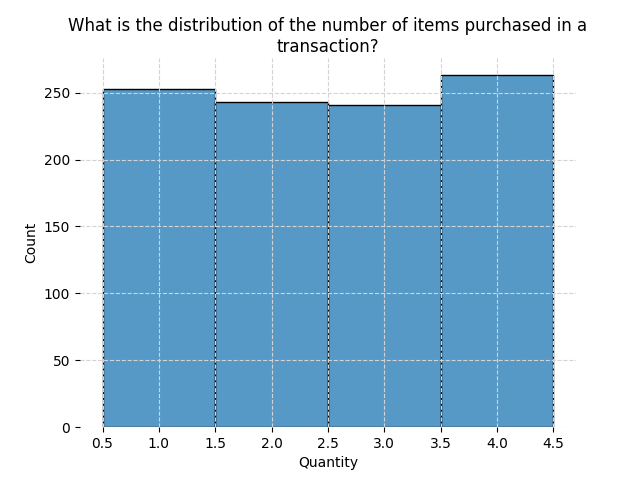

In [21]:
charts[0]

In [24]:
from PIL import Image
from io import BytesIO
import base64
def base64_to_image(base64_string):
    # Decode the base64 string
    byte_data = base64.b64decode(base64_string)
    # Use BytesIO to convert the byte data to image
    return Image.open(BytesIO(byte_data))

In [25]:
img_base64_string = charts[0].raster
img = base64_to_image(img_base64_string)
                

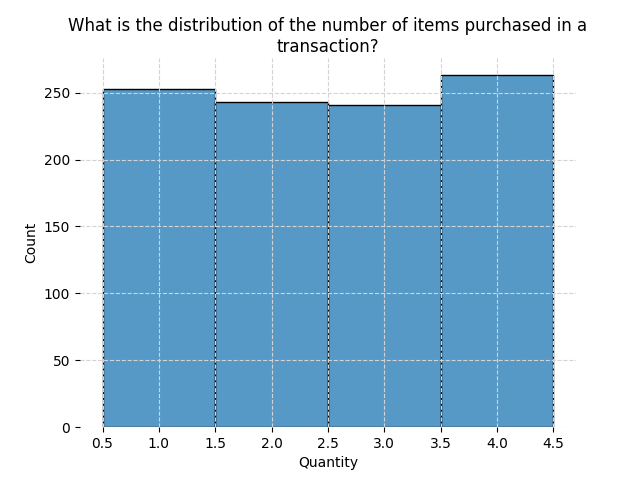

In [26]:
img

In [35]:
imgs = []

In [36]:
for i in range(len(goals)):
    charts = lida.visualize(summary=summary, 
                                        goal=goals[i], 
                                         )
    if len(charts)>0:
        print(charts)
        img_base64_string = charts[0].raster
        img = base64_to_image(img_base64_string)
        imgs.append(img)
    # img

[ChartExecutorResponse(spec=None, status=True, raster='iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAACoTklEQVR4nOydeXgT1frHvzNpkrbpQksXKJQCLbuyyCY7iIKIKIiK4gKIAsoi6hVFvT/Q64pe4aoouOFVwPUC4gIIIiAKKAqigkCBgrKUshTolqSZ8/ujzjSTpZm0Q8+EeT/P0wd68vZ9v+d9z5ycTObMCIwxBoIgCIIgCMI0iLwFEARBEARBELULLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJQyMIAiZNmsQt/syZMyEIQq3EOHHixHmNEyq+N40bN8bo0aPPe+y8vDwIgoB33nlHaRs9ejTi4uLOe2wZQRAwc+bMWotXHX788Ud0794dDocDgiBg+/btvCURBBHh0AKQOC989NFHEAQBS5cu9XutX

In [37]:
imgs

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=640x480>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=640x480>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1000x600>]

In [41]:
c=[]
import time

In [45]:
for i in range(len(goals)):
    charts = lida.visualize(summary=summary, 
                                        goal=goals[i], 
                                         )
    
    c.append((goals[i],charts))

 ```python
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot(data: pd.DataFrame):
    average_total_amount = data['Total_Amount'].mean()
    stub = sns.lineplot(xlabel='Date', ylabel='Average Total Amount', data=data)
    plt.title('What is the average total amount spent in a transaction?', wrap=True)
    plt.axvline(x=average_total_amount, color='red', linestyle='dashed', label=f'Average ({average_total_amount:.2f})')
    plt.legend()
    return plt

chart = plot(data) 
``` 
This code uses the seaborn library to create a line plot of the average total amount spent against date. It first calculates the average total amount by accessing the relevant column in the data DataFrame and using the mean() method. It then creates the line plot using the sns.lineplot() function, with the x-axis representing date and the y-axis representing the average total amount. The plot is customised with a title, and a horizontal line is added to the plot to represent the a

In [46]:
c

[[ChartExecutorResponse(spec=None, status=True, raster='iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAACoTklEQVR4nOydeXgT1frHvzNpkrbpQksXKJQCLbuyyCY7iIKIKIiK4gKIAsoi6hVFvT/Q64pe4aoouOFVwPUC4gIIIiAKKAqigkCBgrKUshTolqSZ8/ujzjSTpZm0Q8+EeT/P0wd68vZ9v+d9z5ycTObMCIwxBoIgCIIgCMI0iLwFEARBEARBELULLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJgiAIgiBMBi0ACYIgCIIgTAYtAAmCIAiCIEwGLQAJQyMIAiZNmsQt/syZMyEIQq3EOHHixHmNEyq+N40bN8bo0aPPe+y8vDwIgoB33nlHaRs9ejTi4uLOe2wZQRAwc+bMWotXHX788Ud0794dDocDgiBg+/btvCURBBHh0AKQOC989NFHEAQBS5cu9Xut